In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [4]:
transplant = pd.read_excel("SimData_Transplant_Ver2.0.xls")
transplant.head()

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,O,inpt,Male,B,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962,0
1,Male,A,home,Male,O,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065,1
2,Female,A,home,Male,A,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200,0
3,Male,O,inpt,Female,B,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556,0
4,Male,O,home,Female,O,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515,0


In [5]:
wait = pd.read_excel("SimData_WList_Ver2.0.xls")
wait.head()

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
0,Female,A,home,42.980695,24.281426,11.328118,8.490318,6905.806322,0
1,Male,O,inpt,43.194412,30.097404,15.295122,20.956402,4583.035351,0
2,Male,A,home,44.952546,30.445467,20.222330,28.063602,2434.090766,0
3,Male,B,home,48.929001,22.588535,16.742302,19.049439,946.529267,0
4,Male,B,home,52.098949,18.317275,19.038291,21.116394,1606.310627,0


In [6]:
# feature encoding
t_encoder = LabelEncoder()
t_encoder.fit(wait['Gender'])
wait['Gender'] = t_encoder.transform(wait['Gender'])
t_encoder.fit(wait['Bloodtype'])
wait['Bloodtype'] = t_encoder.transform(wait['Bloodtype'])
t_encoder.fit(wait['Inpt_attx'])
wait['Inpt_attx'] = t_encoder.transform(wait['Inpt_attx'])

In [7]:
waitcorr = wait.corr()
waitcorr.head()

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
Gender,1.000000,0.007128,-0.093904,0.101501,0.021799,-0.150887,-0.142519,0.001802,-0.030420
Bloodtype,0.007128,1.000000,-0.025073,-0.008702,-0.029758,-0.020027,-0.025995,-0.001405,0.017149
Inpt_attx,-0.093904,-0.025073,1.000000,-0.157185,0.024465,0.497949,0.489769,-0.042622,0.099078
Age,0.101501,-0.008702,-0.157185,1.000000,0.027090,-0.205507,-0.172450,-0.025780,-0.001908
BMI,0.021799,-0.029758,0.024465,0.027090,1.000000,0.022068,0.036871,0.000639,-0.000050


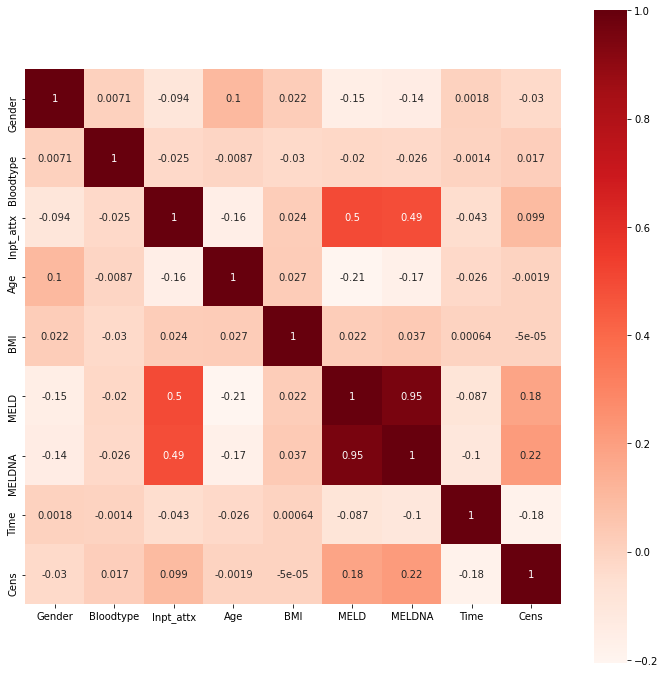

In [8]:
plt.subplots(figsize = (12,12))
# sns.heatmap(transcorr,annot = True,vmax = 1,square = True,cmap = "Reds")
sns.heatmap(waitcorr,annot = True,vmax = 1,square = True,cmap = "Reds")
plt.show()

In [9]:
from sklearn.preprocessing import Normalizer
wait.loc[wait['Time'] < 1825, 'If'] = 0
wait.loc[wait['Time'] > 1825, 'If'] = 1
od_array = np.array(wait['If'])
od_array = od_array.reshape(-1,1)
labels = wait['If']

In [10]:
scaler = Normalizer(norm = 'l2')
wait = pd.DataFrame(scaler.fit_transform(wait),columns=['Gender','Bloodtype','Inpt_attx','Age','BMI','MELD','MELDNA','Time','Cens','If'])

In [11]:
# so i choose meldna meld and inpt_attx as the predict variables
wait_X_train = wait.drop(['Cens', 'Time','Gender','MELDNA','Bloodtype','BMI','If'],axis = 1)
wait_X_train.head()


,Inpt_attx,Age,MELD
0,0.000000,0.006224,0.001640
1,0.000436,0.009424,0.003337
2,0.000000,0.018461,0.008305
3,0.000000,0.051591,0.017653
4,0.000000,0.032410,0.011843


In [12]:
wait_Y_train = pd.DataFrame(np.array(wait[['Cens','Time']]),columns=['Cens','Time'])
import math
import numpy
# wait_Y_train['Time'] = numpy.log(wait_Y_train['Time'])
wait_Y_train.head()

,Cens,Time
0,0.0,0.999972
1,0.0,0.999918
2,0.0,0.999650
3,0.0,0.998023
4,0.0,0.999252


In [13]:
# Start building machine laerning models
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [14]:
num_clusters = np.arange(2,5)
kmeans_results = {}
for size in num_clusters:
    # training the cluster model
    kmeans = KMeans(n_clusters = size).fit(wait_X_train)
    # prdict the clusting model
    preds = kmeans.predict(wait_X_train)
    # evaluate the results
    # kmeans_results[size]["silhouette"] = metrics.silhouette_score(wait_Y_train['Time'], preds, metric='euclidean')
    kmeans_results[size] = metrics.silhouette_score(wait_X_train, preds, metric='euclidean')
display(kmeans_results)

{2: 0.833780618264521, 3: 0.7406584860039432, 4: 0.7218932116560335}

In [15]:
km = KMeans(2, init='k-means++') # initialize
ypred = km.fit_predict(wait_X_train)
wait_X_train['cluster'] = ypred
wait_X_train = wait_X_train.to_numpy()
print(wait_X_train)

[[0.         0.00622368 0.00164033 0.        ]
 [0.00043636 0.00942407 0.00333706 0.        ]
 [0.         0.01846144 0.00830506 0.        ]
 ...
 [0.         0.05762965 0.02081351 0.        ]
 [0.         0.00983589 0.00310161 0.        ]
 [0.         0.04002062 0.00958473 0.        ]]


In [16]:
from copy import deepcopy
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [17]:
wait_X_train = pd.DataFrame(wait_X_train)

In [18]:
data = wait.drop(['Cens', 'Time','Gender','MELDNA','Bloodtype','BMI','If'],axis = 1)
data['cluster'] = ypred
label = pd.DataFrame(labels)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(data, label, train_size=0.7,random_state= 42)

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [21]:
y_pred1 = clf.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
print('Classification Report \n',classification_report(y_test, y_pred1))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred1))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       845
         1.0       0.92      0.93      0.93       655

    accuracy                           0.94      1500
   macro avg       0.93      0.94      0.93      1500
weighted avg       0.94      0.94      0.94      1500

Accuracy of our mode when applied on test set:  0.9353333333333333


In [24]:
## SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 0.01, 10], 'gamma': [10, 0.1, 0.01], 'kernel': ['rbf', 'sigmoid']}

from sklearn.svm import SVC
svc = SVC(C=10, gamma=10)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print('Classification Report \n',classification_report(y_test, y_pred2))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test, y_pred2))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       845
         1.0       0.93      0.96      0.94       655

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy of our mode when applied on test set:  0.9513333333333334


/Users/dorren/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
